# Articial Intelligence and Machine Learning - Coursework 1 - 1st diet
## Modified Chinese-Medicine-163 image dataset
# Student Name: Richard Baah Nkansah
# Student Email: rnkans300@caledonian.ac.uk

I confirm that the material contained within the submitted coursework is all my own work unless otherwise stated below.

---

## 1. Introduction and problem definition
### Dataset Overview
The Modified Chinese-Medicine-163 image dataset contains 17366 images of Chinese medicinal herbs, sourced via web crawlers and cleaned into a well presented format. These images have been categoried into 11 types with approimately 1575 images in each category summarized in Table 1.1.

#### Table 1.1 Dataset Summary
| **Category**            | **Number of Images** |
|--------------------------|----------------------|
| Cordyceps               | 1564                |
| Cornus Fruit            | 1562                |
| Dried Ginger            | 1566                |
| Dried Mulberry          | 1566                |
| Ginseng                 | 1741                |
| Hawthorn                | 1559                |
| Honeysuckle Flower      | 1554                |
| Lily Bulb               | 1565                |
| Oyster Shell            | 1564                |
| Schisandra Berry        | 1568                |
| Smoke Plum              | 1557                |



### Problem Statement
This project seeks to develop a robust maching learning model to effectively classify the 11 type of Chinese Medicinal Herbs. The classification task involved three main parts:

* Develop a basic CNN model making use of convolutional, pooling and dense layers.

*  Improve upon the baseline model making use of one or more techniques such as data augmentation, hyperparameter tuning, loss function modification, architecture enhancement and regularisaton methods with the aim of achieving a high accuracy.

*  Evalute and Compared the results of the two classificaton models.



### Library Imports
The following libraries were utilized in this model classification task:

*  Tensorfow
*   Matplotlib
*  Numpy
*  Sklearn
*  Zipfile

A seed of 42 was used to ensure reproducibility of the project.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
import zipfile
import shutil
import random
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix



In [3]:
# Set seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## 2. Data loading and preparation
### Data Loading
The dataset were imported into colab from Google drive and extracted making used of the **Zipfile library**. Next, the dataset was explored to familiarize with its structure. The exploration involved checking the number of categories and displaying some of the images in the dataset.

**Dataset Structure:** Comprised of 11 classes or categories of Chinese Medicinal herbs, stored in seperated folders with each folder containing approximately 1575 images.

Google drive was mounted into Colab to access the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Zipfile library was used to extract the dataset into a folder. To avoid duplicates, the existence of the extracted folder was first checked.

In [5]:
zip_file_path = '/content/drive/MyDrive/ChineseHerbs.zip'
extracted_dir = '/content/drive/MyDrive' # Extract directly to MyDrive

if not os.path.exists(os.path.join(extracted_dir, 'ChineseHerbs')):  # Check if "ChineseHerbs" folder exists in MyDrive
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)  # Extract to MyDrive
    print(f"File '{zip_file_path}' extracted to '{extracted_dir}'")
else:
    print(f"Directory '{extracted_dir}/ChineseHerbs' already exists. Skipping extraction.")


Directory '/content/drive/MyDrive/ChineseHerbs' already exists. Skipping extraction.


The path to the extracted folder containing the dataset was used as the base directory

In [6]:
base_dir = os.path.join(extracted_dir, 'ChineseHerbs') # Set base_dir to the extracted folder path

The zip file was removed from Google Drive to save space

In [ ]:
#os.remove('/content/drive/MyDrive/ChineseHerbs.zip')

The number of categories with its number of images was checked to help understand the dataset.

In [7]:
# List the categories of herbs
categories = os.listdir(base_dir)
print(f"Total categories: {len(categories)}")
print("Categories:", categories)

Total categories: 11
Categories: ['cordyceps', 'cornus_fruit', 'dried_ginger', 'dried_mulberry', 'ginseng', 'hawthorn', 'honeysuckle_flower', 'lily_bulb', 'oyster_shell', 'schisandra_berry', 'smoke_plum']


In [ ]:
# Count number of images per category
category_counts = {}
for category in categories:
    category_path = os.path.join(base_dir, category)
    category_counts[category] = len(os.listdir(category_path))

for category, count in category_counts.items():
    print(f"{category}: {count} images")

cordyceps: 1564 images
cornus_fruit: 1562 images
dried_ginger: 1566 images
dried_mulberry: 1566 images
ginseng: 1741 images
hawthorn: 1559 images
honeysuckle_flower: 1554 images
lily_bulb: 1565 images
oyster_shell: 1564 images
schisandra_berry: 1568 images
smoke_plum: 1557 images


A number of images contained in the dataset was preview to see how the images look like. The display_sample_images custom function was written to carry out this task.

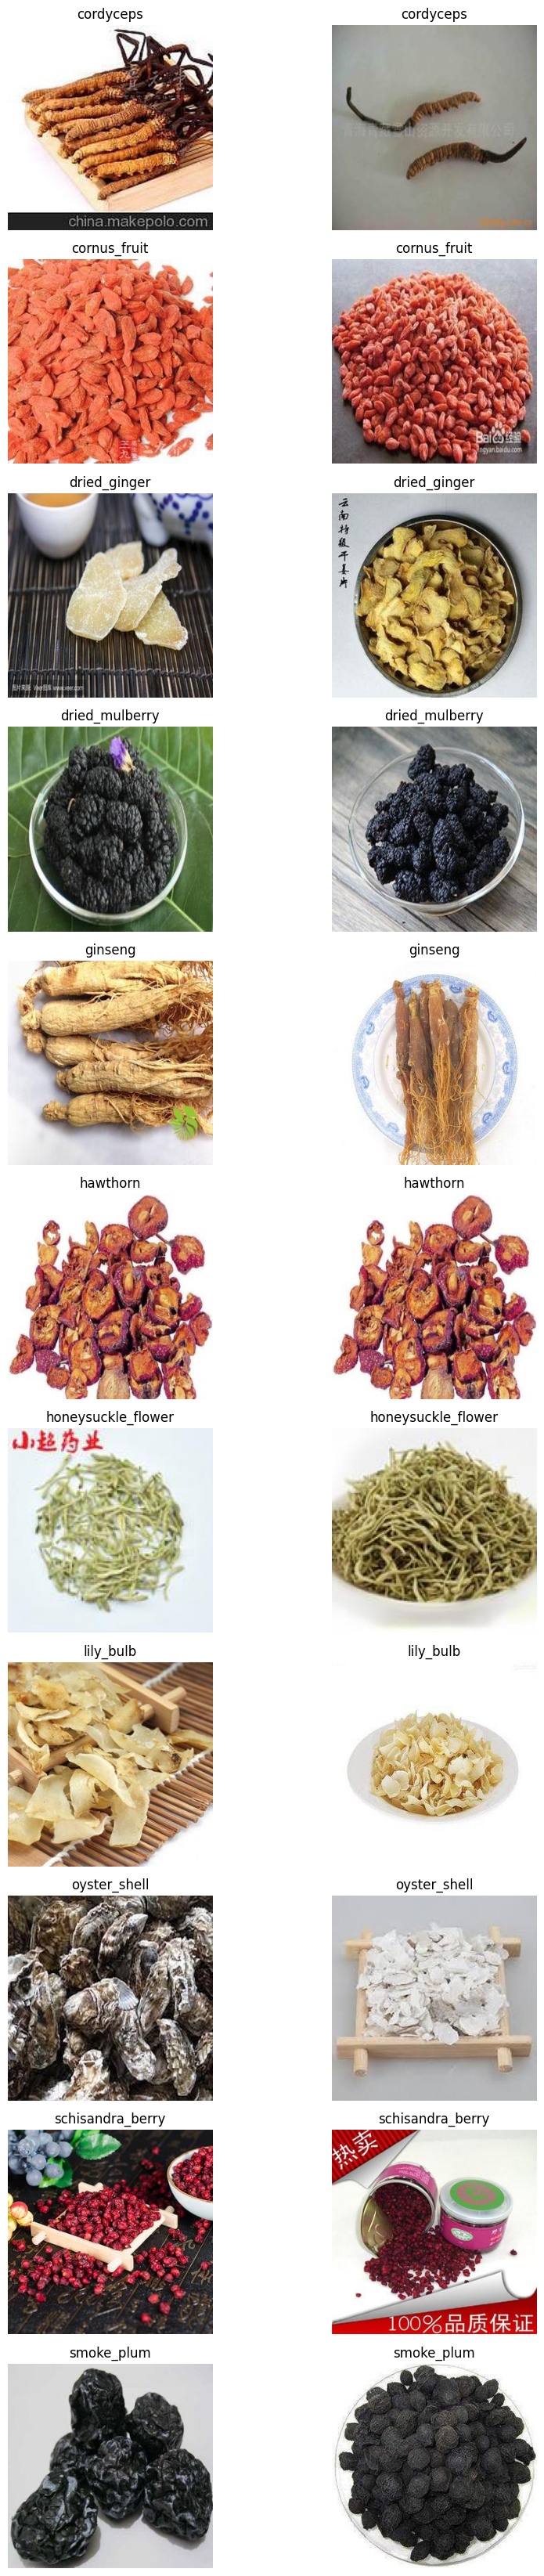

In [ ]:
# Displaying sample images from each category
def display_sample_images(base_dir, categories):
    fig, axes = plt.subplots(len(categories), 2, figsize=(10, len(categories) * 3))
    for i, category in enumerate(categories):
        category_path = os.path.join(base_dir, category)
        sample_images = os.listdir(category_path)[:2]
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(category_path, img_name)
            img = plt.imread(img_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(category)
            axes[i, j].axis("off")
    plt.tight_layout()
    plt.show()

display_sample_images(base_dir, categories)

### Data Preparation

#### Data Preprocessing
Images were resized to 128 by 128 and normalised to a range of 0 and 1 by dividing by 255.

#### Label Encoding
The ImageDataGenerator function in tensorflow was used to automatically mapped the labels using the folder names.

#### Data Splitting
To monitor and evaluate the model's performance on unseen data during and after training, the dataset was split into training, validation and testing with 70,20,10 ratio respectively. The training dataset contained 12150 images, validation had 3474 images and testing had 1742 images.

#### Data Augmentation
To improve the model's generalization, the following data augmentation techniques were applied on the training dataset.

* Horizontal flip
* Zoom range


These augmentation techniques were also selected based real world scenerios. For instance: Herbs images may be photographed at different angles, scales, positions and lighting conditions.



The spliting ratios were defined to facilite the splitting process. The batch size and number of epoch which would be later in the model training process was also defined.

In [8]:
# Define the split ratios
train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

# Batch Size
batch_size = 16

# Number of Epochs
Epochs = 10


The following line of code was used to split the dataset into training, validation and testing.

A folder with name Chinese_dataset_splits would be created with train, validation and test as its sub folders.

In [ ]:
# Define the parent directory for the split folders within 'MyDrive'
split_parent_dir = '/content/drive/MyDrive/Chinese_dataset_splits'

# Use drive.mount and shell command to create the directory if it doesn't exist
try:
    !mkdir -p "{split_parent_dir}"
except OSError as e:
    print(f"Error creating directory: {e}")
    # Handle the error appropriately

# Create train, validation, and test directories inside split_parent_dir
for dataset_type in ['train', 'validation', 'test']:
    dataset_type_path = os.path.join(split_parent_dir, dataset_type)
    if not os.path.exists(dataset_type_path): # Check if dataset_type folder exists
        os.makedirs(dataset_type_path)

# Get the list of categories (subdirectories within base_dir)
categories = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Flag to indicate if skipping message has been printed
skipping_printed = False
files_copied_count = 0  # Counter for copied files
files_skipped_count = 0  # Counter for skipped files

# Split the data for each category
for category in categories:
    # Create category subdirectories within train/val/test inside split_parent_dir
    for dataset_type in ['train', 'validation', 'test']:
        category_path = os.path.join(split_parent_dir, dataset_type, category)
        if not os.path.exists(category_path):  # Check if category folder exists
            os.makedirs(category_path)

    # Get list of images for this category
    source_dir = os.path.join(base_dir, category)
    images = os.listdir(source_dir)
    np.random.shuffle(images)

    train_split = int(len(images) * train_ratio)
    validation_split = int(len(images) * (train_ratio + validation_ratio))

    # Copy images to respective directories inside split_parent_dir, preventing duplicates
    for i, image in enumerate(images):
        source_path = os.path.join(source_dir, image)
        if i < train_split:
            destination_path = os.path.join(split_parent_dir, 'train', category, image)
        elif i < validation_split:
            destination_path = os.path.join(split_parent_dir, 'validation', category, image)
        else:
            destination_path = os.path.join(split_parent_dir, 'test', category, image)

        if not os.path.exists(destination_path):
            shutil.copy(source_path, destination_path)
            files_copied_count += 1  # Increment the counter
        else:
            if not skipping_printed:
                print("Skipping duplicate files...")
                files_skipped_count += 1  # Increment the counter
                skipping_printed = True



# Print summary after processing all categories
print(f"Total categories: {len(categories)}")
print(f"Total files copied: {files_copied_count}")
print(f"Total files skipped: {files_skipped_count}")

Total categories: 11
Total files copied: 17366
Total files skipped: 0


The paths to the training, validation and testing dataset was defined to be in the ImageDataGenerator function.

In [9]:
# Directories for data
split_data_dir = "/content/drive/MyDrive/Chinese_dataset_splits"  # Replace with actual dataset path
train_dir = os.path.join(split_data_dir, "train")
val_dir = os.path.join(split_data_dir, "validation")
test_dir = os.path.join(split_data_dir, "test")

Data generators for training with augmentation, training without augmentation, validation and testing were written to be used for model training.

In [10]:
## Data Preparation

# Data augmentation for training set

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

#No augmentation for training set
train_datagen_no_aug = ImageDataGenerator(
    rescale=1./255  # rescaling
)

# Data preprocessing for validation and test sets (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training, validation, and test sets
train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
       train_dir,
       target_size=(128, 128),
       batch_size=batch_size,
       class_mode='categorical'
   )

validation_generator = validation_datagen.flow_from_directory(
    val_dir,  # Path to the validation data directory
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to the test data directory
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle the test data
)

Found 12150 images belonging to 11 classes.
Found 12150 images belonging to 11 classes.
Found 3474 images belonging to 11 classes.
Found 1742 images belonging to 11 classes.


# Baseline CNN Model
A simple CNN model comprising of convolutional, pooling and dense layers was developed, **trained without augmentation** and evaluated.

## 3. basic CNN model

#### Architecture
*  Three convolutional layer with 16, 32 and 64 filter, each followed by a Max pooling layer. Each with relu activation function

* 128 Dense layer units and relu activaton functon
* Dense Output layer with 11 units and softmax activation function for multi-class classification.

#### Loss funcion
*  Categorical Crossentropy: chosen for its popularity with multi-class classification tasks.

#### Optimizer
*  Adam

#### Batch Size
*  16

#### Epochs
*  10

#### Early Stopping

Basic CNN Model definition

In [16]:
def create_model():
  model = Sequential([
      Input(shape=(128, 128, 3)),
      Conv2D(16, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(32, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(len(categories), activation='softmax')
  ])
  return model

Model Compilation

In [17]:
model_no_aug = create_model()
model_no_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Model Training for 10 epochs

In [18]:
# Train the model without augmentation
history_no_aug = model_no_aug.fit(
    train_generator_no_aug,
    epochs=Epochs,  # number of epochs
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Add early stopping callback
)

Epoch 1/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 316s 409ms/step - accuracy: 0.3898 - loss: 1.6408 - val_accuracy: 0.5832 - val_loss: 1.1302
Epoch 2/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 314s 411ms/step - accuracy: 0.6756 - loss: 0.8895 - val_accuracy: 0.6943 - val_loss: 0.8391
Epoch 3/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 336s 430ms/step - accuracy: 0.7862 - loss: 0.5968 - val_accuracy: 0.7804 - val_loss: 0.6516
Epoch 4/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 366s 409ms/step - accuracy: 0.8690 - loss: 0.3841 - val_accuracy: 0.7884 - val_loss: 0.6942
Epoch 5/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 312s 410ms/step - accuracy: 0.9215 - loss: 0.2321 - val_accuracy: 0.8198 - val_loss: 0.6247
Epoch 6/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 331s 421ms/step - accuracy: 0.9533 - loss: 0.1421 - val_accuracy: 0.8135 - val_loss: 0.7178
Epoch 7/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 326s 426ms/step - accuracy: 0.9653 - loss: 0.1071 - val_accuracy: 0.8345 - val_loss: 0.8062
Epoch 8/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 363s 401ms/step - accuracy: 0.9779 -

## 4. Model evaluation
The basic CNN model was tested on unseen data which produced 84% accuracy.

In [19]:
# Evaluate the model without augmentation
test_loss_no_aug, test_accuracy_no_aug = model_no_aug.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.8405 - loss: 0.5342


# Enhance Model

An enhanced model based on the simple CNN above, comprising of convolutional, pooling, dense layers and **dropout layers** was developed, **trained with augmentation** and evaluated.


## 5. Enhanced Baseline model

## Enhanced Model

#### Architecture
*  Three convolutional layer with 16, 32, 64 and 128 filter, each followed by a Max pooling layer. Each with relu activation function

* 512 Dense layer units and relu activaton functon

*  **Dropout layers** after each convolutional and dense layers
* Dense Output layer with 11 units and softmax activation function for multi-class classification.

#### Loss funcion
*  Categorical Crossentropy: chosen for its popularity with multi-class classification tasks.

#### Optimizer
*  Adam

#### Batch Size
*  16

#### Epochs
*  10

#### Early Stopping

Enhanced Model Definition

In [11]:
def create_enhanced_model():
  enhanced_model = Sequential([
        Input(shape=(128, 128, 3)),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),  # Dropout after the first block

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),  # Dropout after the second block

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.5),  # Dropout after the third block

        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),  # Dropout in the fully connected layer
        Dense(len(categories), activation='softmax')  # Output layer
    ])
  return enhanced_model

Model Compilation

In [12]:
model_aug = create_enhanced_model()
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Model Training

In [13]:
# Train the model with augmentation
history_aug = model_aug.fit(
    train_generator_aug,
    epochs=Epochs,  # number of epochs
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Add early stopping callback
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


760/760 ━━━━━━━━━━━━━━━━━━━━ 4500s 6s/step - accuracy: 0.3089 - loss: 1.8236 - val_accuracy: 0.5400 - val_loss: 1.1828
Epoch 2/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 411s 538ms/step - accuracy: 0.5439 - loss: 1.1742 - val_accuracy: 0.5832 - val_loss: 1.0986
Epoch 3/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 401s 526ms/step - accuracy: 0.6047 - loss: 1.0182 - val_accuracy: 0.6885 - val_loss: 0.8437
Epoch 4/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 436s 518ms/step - accuracy: 0.6496 - loss: 0.9139 - val_accuracy: 0.6940 - val_loss: 0.7898
Epoch 5/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 397s 521ms/step - accuracy: 0.6816 - loss: 0.8225 - val_accuracy: 0.7225 - val_loss: 0.7838
Epoch 6/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 400s 525ms/step - accuracy: 0.7255 - loss: 0.7492 - val_accuracy: 0.7237 - val_loss: 0.7796
Epoch 7/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 391s 513ms/step - accuracy: 0.7445 - loss: 0.6919 - val_accuracy: 0.7991 - val_loss: 0.5707
Epoch 8/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 443s 514ms/step - accuracy: 0.7507 - loss: 0.6587

Model Evaluation

In [14]:
# Evaluate the model with augmentation
test_loss_aug, test_accuracy_aug = model_aug.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

108/108 ━━━━━━━━━━━━━━━━━━━━ 516s 5s/step - accuracy: 0.8295 - loss: 0.5024


## 6. Model evaluation

The enhanced model was tested on unseen data which produced 82% accuracy.

### Model Comparison
| Metric | Model with Augmentation (Enhanced Model) | Model without Augmentation (basic CNN) |
|---|---|---|
| Accuracy | 84% | 82% |
| Precision (macro avg) | 0.84 | 0.83 |
| Recall (macro avg) | 0.84 | 0.82 |
| F1-score (macro avg) | 0.84 | 0.82 |
| Precision (weighted avg) | 0.84 | 0.83 |
| Recall (weighted avg) | 0.84 | 0.82 |
| F1-score (weighted avg) | 0.83 | 0.82 |

#### Accuracy
Model with augmentation(enhanced model) achieved higher accuracy of 84% compared with the model without augmentation (basic model) of 82%

### Macro Average
The model with augmentation(enhanced model) had a higher macro averaged indicating a better performance across all the classes compared to model without augmentation (basic CNN)

### Weighted Average
For precision, recall and f1-score the model with augmentation(enhanced model) achieved a higher score compared to model without augmentation (basic CNN)


Test Score comparison of the basic CNN and enhanced model

In [20]:
# Print evaluation results
print(f"Model with Augmentation - Test Loss: {test_loss_aug}, Test Accuracy: {test_accuracy_aug}")
print(f"Model without Augmentation - Test Loss: {test_loss_no_aug}, Test Accuracy: {test_accuracy_no_aug}")


Model with Augmentation - Test Loss: 0.4660436511039734, Test Accuracy: 0.8368055820465088
Model without Augmentation - Test Loss: 0.5951863527297974, Test Accuracy: 0.8217592835426331


Visualisation of the Accuracy and loss for the basic CNN and Enhanced Model.

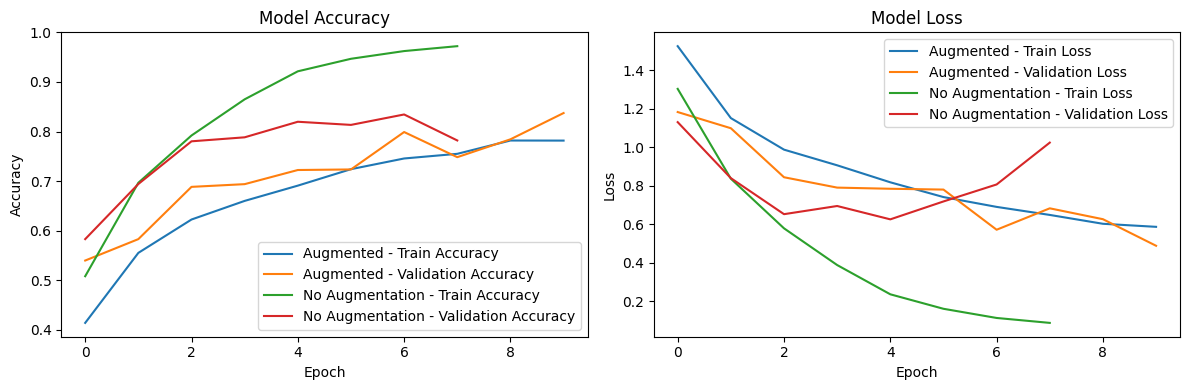

109/109 ━━━━━━━━━━━━━━━━━━━━ 22s 203ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step

Classification Report (Model with Augmentation):
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       157
           1       0.89      0.98      0.93       157
           2       0.89      0.71      0.79       157
           3       0.76      0.76      0.76       157
           4       0.72      0.73      0.73       175
           5       0.98      0.90      0.94       156
           6       0.88      0.97      0.93       156
           7       0.74      0.89      0.81       157
           8       0.83      0.90      0.87       157
           9       0.95      0.77      0.85       157
          10       0.74      0.80      0.77       156

    accuracy                           0.84      1742
   macro avg       0.84      0.84      0.84      1742
weighted avg       0.84      0.84      0.83      1742


Classification Report (Model without Augmentatio

In [23]:
# Plot training history (accuracy and loss) for both models
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Augmented - Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Augmented - Validation Accuracy')
plt.plot(history_no_aug.history['accuracy'], label='No Augmentation - Train Accuracy')
plt.plot(history_no_aug.history['val_accuracy'], label='No Augmentation - Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Augmented - Train Loss')
plt.plot(history_aug.history['val_loss'], label='Augmented - Validation Loss')
plt.plot(history_no_aug.history['loss'], label='No Augmentation - Train Loss')
plt.plot(history_no_aug.history['val_loss'], label='No Augmentation - Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Generate classification reports and confusion matrices for both models

# Predictions for the model with augmentation
y_pred_aug = model_aug.predict(test_generator)
y_pred_aug_labels = np.argmax(y_pred_aug, axis=1)

# Predictions for the model without augmentation
y_pred_no_aug = model_no_aug.predict(test_generator)
y_pred_no_aug_labels = np.argmax(y_pred_no_aug, axis=1)

# True labels for the test set
y_true = test_generator.classes

# Classification reports
print("\nClassification Report (Model with Augmentation):")
print(classification_report(y_true, y_pred_aug_labels))

print("\nClassification Report (Model without Augmentation):")
print(classification_report(y_true, y_pred_no_aug_labels))


Confusion Matrix comparison for the basic CNN and Enhanced Model.

The model with augmentation(enhanced model) had a better performance across all the classes compared to the model without augmentation (basic CNN)

In [24]:
# Confusion matrices
cm_aug = confusion_matrix(y_true, y_pred_aug_labels)
cm_no_aug = confusion_matrix(y_true, y_pred_no_aug_labels)

print("\nConfusion Matrix (Model with Augmentation):")
print(cm_aug)

print("\nConfusion Matrix (Model without Augmentation):")
print(cm_no_aug)


Confusion Matrix (Model with Augmentation):
[[124   0   0   0  20   0   2   0   8   0   3]
 [  0 154   0   0   0   0   0   0   0   2   1]
 [  1   0 112   0  11   0   2  25   4   0   2]
 [  3   1   0 119   0   0   0   0   1   2  31]
 [  7   0   5   0 128   0   8  23   4   0   0]
 [  4   2   1   0   5 140   0   1   0   3   0]
 [  0   0   0   2   0   0 152   0   2   0   0]
 [  0   0   2   0   6   0   6 139   4   0   0]
 [  0   0   5   1   8   0   1   0 141   0   1]
 [  0  16   0   8   0   3   1   0   2 121   6]
 [  1   0   1  26   0   0   0   0   3   0 125]]

Confusion Matrix (Model without Augmentation):
[[137   1   4   0   5   2   0   2   3   1   2]
 [  0 140   0   0   0   0   0   0   0  17   0]
 [  5   0 123   1   7   0   0  11   8   0   2]
 [  1   1   0 123   0   1   0   0   2   2  27]
 [ 18   0  14   0 122   2   1  14   3   1   0]
 [ 15   1   1   0   0 138   0   0   0   1   0]
 [  2   0   4   0   3   0 139   4   4   0   0]
 [  2   0  11   0   9   0   0 131   4   0   0]
 [  5   0  12

## 7. Discussion and conclusion
### Discusion
The enhanced model trained with augmentation performed better accross all the evaluated metrics ( accuracy, macro-averaged precision, recall, and F1-score, weighted-averaged precision, recall, and F1-score). The augmentation techniques improved the generalization of the enhanced model. The dropout layer also helped minimize overfitting compared to the basic CNN.

### Conclusion
The enhanced model trained with augmentation performed slightly better than the basic CNN model. Also in terms of overfitting, the dropped out layer add to the enhanced model helped minimize overfitting compare to the basic CNN without the dropout layer.

### Limitation
Due the time, the models was not trained enough to improve the accuracies of the model.

### Recommendation
*  Other augmentation techniques can be explored to further increase the accuracy of the enhanced model.
*  The number of epochs can also be increased to improve the accuracy of the enhanced model.

## Sources:

- choosing a loss function : https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

- Implemtnatation of ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/all_symbols